JWST_MIRI.F1000W.dat
9.953116516778534
JWST_MIRI.F1065C.dat
10.562839025880558
JWST_MIRI.F1130W.dat
11.308501361802307
JWST_MIRI.F1140C.dat
11.310303237752807
JWST_MIRI.F1280W.dat
12.810137914219364
JWST_MIRI.F1500W.dat
15.063506136295944
JWST_MIRI.F1550C.dat
15.516773860068964
JWST_MIRI.F1800W.dat
17.98372229363637
JWST_MIRI.F2100W.dat
20.795005062513376
JWST_MIRI.F2300C.dat
22.64464423767799
JWST_MIRI.F2550W.dat
25.364001534544258
JWST_MIRI.F560W.dat
5.635256467171749
JWST_MIRI.F770W.dat
7.639333710593687
JWST_NIRCam.F070W.dat
0.7039119465065372
JWST_NIRCam.F090W.dat
0.9021528592183863
JWST_NIRCam.F115W.dat
1.1542608549288078
JWST_NIRCam.F140M.dat
1.4053232511520224
JWST_NIRCam.F150W.dat
1.5007438277814038
JWST_NIRCam.F150W2.dat
1.659211414608797
JWST_NIRCam.F162M.dat
1.6272470538308892
JWST_NIRCam.F164N.dat
1.6445362310405647
JWST_NIRCam.F182M.dat
1.8451671672429513
JWST_NIRCam.F187N.dat
1.8738986052476614
JWST_NIRCam.F200W.dat
1.9886483488466726
JWST_NIRCam.F210M.dat
2.095451306411

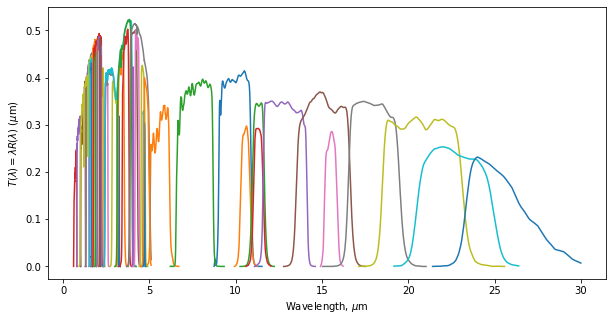

In [2]:
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

# filt_dir = '/lustre/work/connor.bottrell/Simulations/IllustrisTNG/Scripts/SKIRT/Photometry/Filters/'
# tran_dir = '/lustre/work/connor.bottrell/Simulations/IllustrisTNG/Scripts/SKIRT/Photometry/SKIRT9/Filters/'
filt_dir = '/u/bconn/Projects/Simulations/IllustrisTNG/Scripts/SKIRT/Photometry/Filters'
tran_dir = '/u/bconn/Projects/Simulations/IllustrisTNG/Scripts/SKIRT/Photometry/SKIRT9/Filters'

filt_names = list(sorted([filt.split('/')[-1] for filt in glob(f'{filt_dir}/JWST*.dat')]))
             
fig,ax = plt.subplots(figsize=(10,5))
ax.set_xlabel('Wavelength, $\mu$m')
ax.set_ylabel('$T(\lambda) = \lambda R(\lambda)$ ($\mu$m)')

min_wl = 1e99

for filt in filt_names:
    # wl angstrom, response unitless
    wl,response = np.loadtxt(f'{filt_dir}/{filt}',unpack=True) 
    wl*=1e-4 # to microns
    # transmission correction for energy counters / photon counters
    if 'Spitzer_IRAC' in filt:
        transmission = response
    else:
        transmission = response*wl
    ax.plot(wl,response)
    min_wl = np.minimum(min_wl,min(wl))
   # np.savetxt(f'{tran_dir}/{filt}',np.column_stack([wl,transmission]))
    
    print(filt)
    print(np.sqrt(np.trapz(transmission,wl)/np.trapz(transmission/wl**2,wl)))
    
    
print(min_wl)


In [13]:
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

# filt_dir = '/lustre/work/connor.bottrell/Simulations/IllustrisTNG/Scripts/SKIRT/Photometry/Filters/'
filt_dir = '/lustre/work/connor.bottrell/Simulations/IllustrisTNG/Scripts/SKIRT/Photometry/SKIRT9/Filters/'

# filt_dir = '/u/bconn/Projects/Simulations/IllustrisTNG/Scripts/SKIRT/Photometry/SKIRT9/Filters'

filt_names = list(sorted([filt.split('/')[-1] for filt in glob(f'{filt_dir}/JWST*.dat')]))

print([filt.replace('.dat','') for filt in filt_names])

['JWST_MIRI.F1000W', 'JWST_MIRI.F1065C', 'JWST_MIRI.F1130W', 'JWST_MIRI.F1140C', 'JWST_MIRI.F1280W', 'JWST_MIRI.F1500W', 'JWST_MIRI.F1550C', 'JWST_MIRI.F1800W', 'JWST_MIRI.F2100W', 'JWST_MIRI.F2300C', 'JWST_MIRI.F2550W', 'JWST_MIRI.F560W', 'JWST_MIRI.F770W', 'JWST_NIRCam.F070W', 'JWST_NIRCam.F090W', 'JWST_NIRCam.F115W', 'JWST_NIRCam.F140M', 'JWST_NIRCam.F150W', 'JWST_NIRCam.F150W2', 'JWST_NIRCam.F162M', 'JWST_NIRCam.F164N', 'JWST_NIRCam.F182M', 'JWST_NIRCam.F187N', 'JWST_NIRCam.F200W', 'JWST_NIRCam.F210M', 'JWST_NIRCam.F212N', 'JWST_NIRCam.F250M', 'JWST_NIRCam.F277W', 'JWST_NIRCam.F300M', 'JWST_NIRCam.F322W2', 'JWST_NIRCam.F323N', 'JWST_NIRCam.F335M', 'JWST_NIRCam.F356W', 'JWST_NIRCam.F360M', 'JWST_NIRCam.F405N', 'JWST_NIRCam.F410M', 'JWST_NIRCam.F430M', 'JWST_NIRCam.F444W', 'JWST_NIRCam.F460M', 'JWST_NIRCam.F466N', 'JWST_NIRCam.F470N', 'JWST_NIRCam.F480M']


In [8]:
filters

'JWST_MIRI.F1000W.dat,JWST_MIRI.F1065C.dat,JWST_MIRI.F1130W.dat,JWST_MIRI.F1140C.dat,JWST_MIRI.F1280W.dat,JWST_MIRI.F1500W.dat,JWST_MIRI.F1550C.dat,JWST_MIRI.F1800W.dat,JWST_MIRI.F2100W.dat,JWST_MIRI.F2300C.dat,JWST_MIRI.F2550W.dat,JWST_MIRI.F560W.dat,JWST_MIRI.F770W.dat,JWST_NIRCam.F070W.dat,JWST_NIRCam.F090W.dat,JWST_NIRCam.F115W.dat,JWST_NIRCam.F140M.dat,JWST_NIRCam.F150W.dat,JWST_NIRCam.F150W2.dat,JWST_NIRCam.F162M.dat,JWST_NIRCam.F164N.dat,JWST_NIRCam.F182M.dat,JWST_NIRCam.F187N.dat,JWST_NIRCam.F200W.dat,JWST_NIRCam.F210M.dat,JWST_NIRCam.F212N.dat,JWST_NIRCam.F250M.dat,JWST_NIRCam.F277W.dat,JWST_NIRCam.F300M.dat,JWST_NIRCam.F322W2.dat,JWST_NIRCam.F323N.dat,JWST_NIRCam.F335M.dat,JWST_NIRCam.F356W.dat,JWST_NIRCam.F360M.dat,JWST_NIRCam.F405N.dat,JWST_NIRCam.F410M.dat,JWST_NIRCam.F430M.dat,JWST_NIRCam.F444W.dat,JWST_NIRCam.F460M.dat,JWST_NIRCam.F466N.dat,JWST_NIRCam.F470N.dat,JWST_NIRCam.F480M.dat,'